1) Antes que nada, lee cuidadosamente estas instrucciones y las que aparecen en la hoja con la contraseña. 

2) Cambia el nombre de este archivo sustituyendo "nombre.apellido" por los tuyos, tal como aparecen en tu dirección de correo electrónico de la UAM.

3) Este archivo debe quedar en la carpeta "ENTREGA..." que está en el escritorio de tu cuenta de examen. Lo mejor es que esté en esa carpeta desde el comienzo del examen. 

4) <FONT color="red">El examen resuelto debe quedar en este único archivo. No se puede usar un archivo para cada pregunta.</FONT>

5) Recuerda que hay que deshabilitar el salvapantallas al comenzar el examen, tal como está indicado en la hoja con la contraseña. 


CALIFICACIÓN:


In [1]:
3+3+3

9

COMENTARIOS:

1)

### Nota por parte del alumno:
No he estado en la clase contigo y por tanto, ciertas dudas que he tenido de interpretacion respecto a los enunciados las he preguntado a los profesores de guardia. He intentado hacer el examen cogiendo la mayoria de posibilidades que presenta el enunciado

### Ejercicio 1

(3 puntos) Una urna contiene tres bolas blancas y tres negras. Juegas al siguiente juego: extraes tres bolas, al azar (es decir, mediante una  *mano inocente*),  de la urna y si las tres son del mismo color ganas. En caso contrario devuelves a la urna las dos bolas del mismo color, desechas la otra, y vuelves a extraer tres bolas. Como antes, ganas si las tres bolas son del mismo color. El juego termina, y pierdes, cuando la urna contiene  únicamente dos bolas y, por tanto, es imposible extraer tres de ella.

Calcula, mediante una simulación, la probabilidad de ganar. 

Como podemos ver en la resolucion hemos decidido llamar 0 a las bolas blancas y 1 a las bolas negras. Realizamos las extracciones teniendo en cuenta que con cada bola quedan menos bolas de ese color en la caja. Despues comprobamos el color y si no son las tres iguales procedemos a realizar lo que se nos idica en el enunciado, añadiendo dos bolas del mismo color a la caja.

En el bucle vamos comprobando que el numero de bolas no sea menor que dos una vez añadidas las dos nuevas.

Como vemos al final, la probabilidad es de aprox 0.73, lo cual parece razonable ya que es relativamente sencillo ganar el juego al ir introduciendo al errar bolas de un mismo color y quitando una del otro

In [356]:
#Dado que no se indica y que es mas intuitivo, he supuesto que se hace la extraccion bola a bola
def sacar_bola(bn,bb):
    bola = randint(1,bn+bb)
    if bola <= bn:
        return 1
    return 0
def jugar():
    bn = 3
    bb = 3
    #Suponemos que las blancas son 0 y las negras son 1
    while bn + bb > 2:
        #Sacamos las 3 bolas. Cuando sacamos una vemos de que color es y actualizamos el numero de bolas en la urna
        bola1 = sacar_bola(bn,bb)
        if bola1 == 0:
            bb = bb - 1
        else:
            bn = bn - 1
        bola2 = sacar_bola(bn,bb)
        if bola2 == 0:
            bb = bb - 1
        else:
            bn = bn - 1
        bola3 = sacar_bola(bn,bb)
        if bola3 == 0:
            bb = bb - 1
        else:
            bn = bn - 1
        #Si son iguales devolvemos True
        if bola1 == bola2 and bola2 == bola3 and bola1 == bola3:
            return True
        #Si no, vemos como son. Si suman 1 (0 + 0 + 1) añadimos las dos blancas
        if bola1 + bola2 + bola3 == 1:
            bb = bb + 2
        #Si suman 2 (1 + 1 + 0) añadimos las dos negras y repetimos el proceso
        elif bola1 + bola2 + bola3 == 2:
            bn = bn + 2
    #Si salimos del bucle es que nos hemos quedado sin bolas en la caja y devolvemos Falso
    return False

In [351]:
def probabilidad1(N):
    res = 0
    for int in xsrange(N):
        if jugar():
            res = res + 1
    return res,res/N.n()

In [358]:
probabilidad1(10^5)

(72853, 0.728530000000000)

###  Ejercicio 2

En la sección 11.5.4 de las notas del curso se discute el llamado "truco de Monty Hall",  que produce un resultado que es bastante  contrario a la intuición. En este ejercicio debes simular la siguiente variante y comparar el resultado obtenido con el de las notas: el concursante elige una puerta, el presentador le dice que no sabe en qué puerta está el premio y va a elegir, al azar,  una de las dos puertas restantes y abrirla. Detrás de la puerta que abre no está el premio y entonces ofrece al concursante cambiar de puerta. (2 puntos) Calcula, mediante simulación, la probabilidad que tiene el concursante de ganar el premio si cambia de puerta. 

(1 punto) ¿Cuál es la explicación del resultado, diferente al de las notas, que se ha obtenido?

In [279]:
## Se incluye el código de la versión estándar del truco

def jugada_mh(eleccion):
    me_cambio = 1 
    puertas = [0]*3
    puertas[randint(0,2)] = 1 
    quedan = puertas 
    del quedan[eleccion] 
    la_otra = (1 in quedan)
    if me_cambio == 1:
        return la_otra
    else:
        return puertas[eleccion] 

sum([jugada_mh(0) for int in xrange(100000)])

66226

### Apartado 1
Nota: para calcular la probabilidad hemos tenido en cuenta lo siguiente:

    1- Al elegir al azar y el presentador no saber donde está el premio puede elegir la puerta con el premio. Si lo 
       hace devolvemos -1 

    2- Una vez se elige una aleatoria se cogera la otra

In [416]:
def jugada_mh2(eleccion):
    me_cambio = 1 
    puertas = [0]*3
    puertas[randint(0,2)] = 1 
    quedan = puertas
    del quedan[eleccion]
    nueva = randint(0,1)
    if quedan[nueva] == 1:
        return -1
    if me_cambio == 1:
        if nueva == 0:
            nueva = 1
        else:
            nueva = 0
        return quedan[nueva]
    else:
        return puertas[eleccion]


Finalmente he decidido hacer tres pruebas. En la primera representaremos el numero de veces que al cambiar elige la puerta buena frente al numero TOTAL de veces que se hace (es decir, se incluye las que el presentador ha elegido la puerta correcta aleatoriamente)

In [417]:
res = 0
tot = 0
for int in xsrange(100000):
    p = jugada_mh2(0)
    tot = tot + 1
    if p == 1:
        res = res + 1
print res/tot.n(),res,tot

0.333410000000000 33341 100000


En la segunda vamos a suponer que el que elige tiene dos dedos de frente y si le enseñan el premio, cambia a la del premio

In [420]:
res = 0
tot = 0
for int in xsrange(100000):
    p = jugada_mh2(0)
    tot = tot + 1
    if p == 1 or p == -1:
        res = res + 1
print res/tot.n(),res,tot

0.664640000000000 66464 100000


En la tercera (y la que a mi parecer es la que pregunta el enunciado) solo cogemos aquellas veces que el presentador escoge la puerta que no tiene el premio y al cambiar de puerta elegimos la que tiene el premio

In [419]:
res = 0
tot = 0
for int in xsrange(100000):
    p = jugada_mh2(0)
    if p == -1:
        continue
    tot = tot + 1
    if p == 1:
        res = res + 1
print res/tot.n(),res,tot

0.500120087663995 33317 66618


### Apartado 2
Como podemos ver en la tercera prueba (que es a mi parcer la que hay que analizar) lo que podemos ver es que al cambiar si nos han enseñado una aleatoria que no tiene premio, baja a la mitad las probabilidades de que cambiando de puerta, obtengamos el premio. Esto es porque, como solo estamos contando las que no se han elegido la puerta correcta al hacer el presentador la eleccion, es mas probable que haya sido la eleccion con dos puertas que no tienen nada (y por tanto, la elegida inicialmente es la que tiene el premio).

En la segunda podemos ver que es igual que el original, debido a que si se hiciera con el original, se habria elegido la otra puerta y se hubiera cambiado a la que contiene el premio (que es la que el presentador a enseñado)

### Ejercicio 3

(4 puntos) Supongamos unas elecciones con sólo dos candidatos $A$ y $B$. El candidato $A$ gana las elecciones con $a$ votos frente a los $b$ votos al candidato $B$. El recuento de los votos se hace de uno en uno y con elección aleatoria de los votos que se escrutan. Nos interesa calcular la probabilidad de que a lo largo de todo el recuento $A$ siempre vaya por delante de $B$. 

1. (3 puntos) Escribe una función $probabilidad(a,b,N)$, con $N$ el número de vueltas del bucle usado en la simulación, y que devuelva la probabilidad de que el candidato $A$ vaya por delante del $B$ durante todo el recuento. Recomiendo usar un par de funciones auxiliares: una para generar el resultado de un recuento (al azar) con $a$ votos para $A$ y $b$ votos para $B$, y la segunda para comprobar si $A$ ha ido durante el recuento siempre por delante de $B$. 

2. (1 punto) Usando la función anterior, con $a=60$ y un valor adecuado de $N$ para que se ejecute en un tiempo del orden, como máximo,  de $2$ minutos, calcula $probabilidad(60,b,N)$ para $b$ entre $0$ y $60$, y construye un modelo, usando $find\_fit$,  para la dependencia de la probabilidad como función de $b$. Compara en un gráfico los puntos $(b,probabilidad(60,b,N))$ con la gráfica de la función propuesta como modelo.  


### Apartado 1

He creado dos funciones auxiliares para la resolucion de este ejercicio. La primera genera una lista con el orden de los votos. Tenemos en cuenta que hay mas votos de a que de b por tanto es mas posible coger un voto de a que de b. Por ello (y al igual que en el ejercicio 1) he creado un numero aleatorio entre 1 y el numero total de votos. Si este numero es menor que el numero de votos restantes de b, añado un voto de b a la lista. Si no, añado un voto de a a la lista. Cuando los votos llegan a 0 es imposible que se le pueda añadir a la lista (ya que el numero va de 1 hasta la suma de los votos)

La segunda funcion hace el recuento de votos y en el momento que el numero de votos de b sea mayor que el de a devuelve falso. Si no, devuelve verdadero

In [359]:
#Funciones auxiliares
def votos(a,b):
    L = []
    numa = a
    numb = b
    for int in xsrange(a+b):
        num = randint(1,numa + numb)
        if num <= numb:
            L.append('b')
            numb = numb - 1
        else:
            L.append('a')
            numa = numa - 1
    return L
def recuento(L):
    numa = 0
    numb = 0
    for item in L:
        if item == 'a':
            numa = numa + 1
        else:
            numb = numb + 1
        if numb > numa:
            return False
    return True

La funcion probabilidad simplemente calcula el numero de veces que recuento devuelve true y calcula el porcentaje final

In [360]:
def probabilidad(a,b,N):
    res = 0
    for int in xsrange(N):
        L = votos(a,b)
        if recuento(L):
            res = res + 1
    return res/N.n()

In [408]:
probabilidad(60,30,1000)

0.510000000000000

### Apartado 2

In [ ]:
L1 = []
for i in xsrange(61):
    L1.append((i,probabilidad(60,i,10^4)))

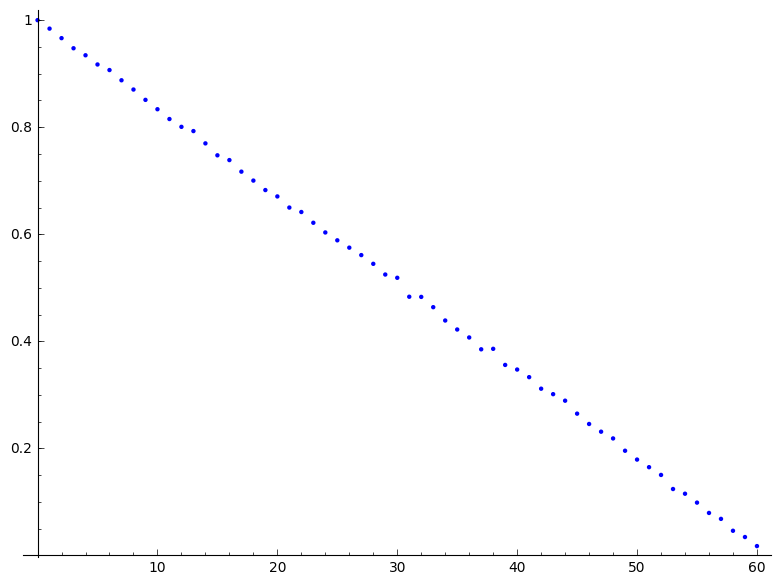

In [398]:
points(L1)

In [404]:
var('A B C'); model(x)=A*x^(B) + C

In [405]:
diccionario = find_fit(L1,model,solution_dict=True); print diccionario

{C: 0.9993040995626669, B: 0.9992041336498032, A: -0.01641407352106489}


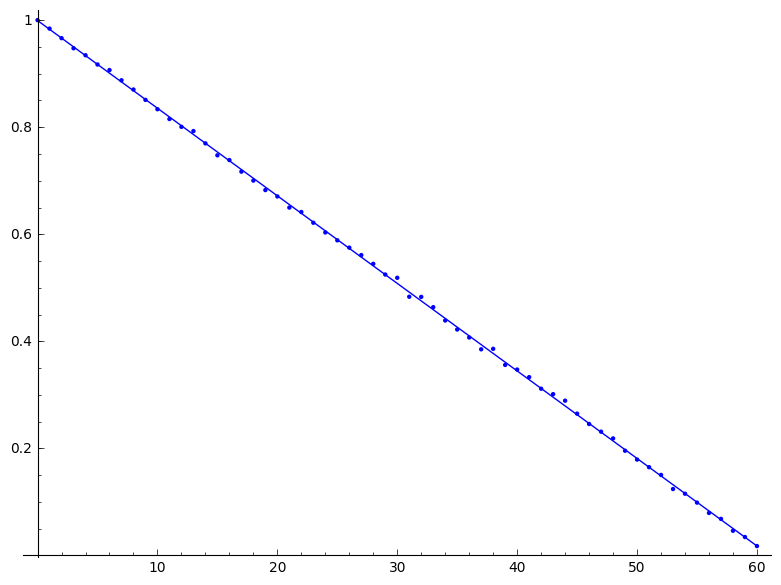

In [406]:
points(L1)+plot(diccionario[A]*x^(diccionario[B]) + diccionario[C],x,0,60)

Como podemos ver en la gráfica, nos encontramos que la probabilidad disminuye linealmente conforme el numero de puntos de b sube. He decidido hacer el modelo con ax^b + c aunque podria directamente sustituirse la b por 1 debido a que hemos visto en los puntos anteriormente que descendia de forma lineal.

Por otro lado he cogido como n 10^4 ya que al hacer diversas pruebas tarda aproximadamente un par de minutos